# Automated-Loan-Eligibility-Prediction

## Abhishek Kumar

## IIT BHU 25

In [3]:
import pandas as pd 
import numpy as np                     
import seaborn as sns                  
import matplotlib.pyplot as plt        
%matplotlib inline 
import warnings                       
warnings.filterwarnings("ignore")

## **Background**

Problem Statement:
Dream Housing Finance company deals in all home loans. They have a presence across all urban, semi-urban, and rural areas. Customer-first applies for a home loan after that company validates the customer eligibility for a loan.

The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling the online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and others. To automate this process, they have given a problem to identify the customer's segments, those are eligible for loan amount so that they can specifically target these customers.

For this problem, we have two CSV files: train, and test.

Train file will be used for training the model, i.e. our model will learn from this file. It contains all the independent variables and the target variable.
The test file contains all the independent variables, but not the target variable. We will apply the model to predict the target variable for the test data.

## **EDA**

In [4]:
train=pd.read_csv('loan predict TRAIN.csv')
test=pd.read_csv('loan predict TEST.csv')

In [5]:
train_original=train.copy()
test_original=test.copy()

In [6]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [8]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [10]:
train=train.drop('Loan_ID',axis=1) 
test=test.drop('Loan_ID',axis=1)

In [11]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [12]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


##### Univariate Analysis
It is the simplest method of data analysis in which we examine each variable individually. To calculate the number of each category in a given variable, we can use frequency tables or bar charts. To examine the distribution of numerical variables, Probability Density Functions (PDF) can be employed.

We will first look at the target variable, i.e., Loan_Status. As it is a categorical variable, let us look at its frequency table, percentage distribution, and bar plot.

In [13]:
train['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [14]:
train['Loan_Status'].value_counts(normalize=True)

Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64

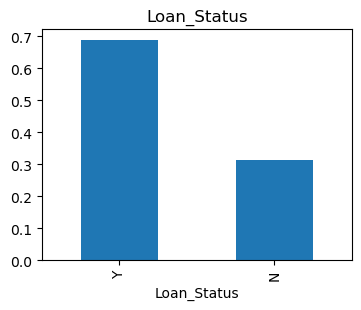

In [15]:
plt.figure(figsize=(4,3))
train['Loan_Status'].value_counts(normalize=True).plot.bar(title='Loan_Status') 
plt.show()

- Arround 69% people got the approval

- Now, let’s visualize each variable separately. Different types of variables are Categorical, ordinal, and numerical.

**Categorical Features**

- Gender
- Married
- Self_employed
- Credit_History
- Loan_status

**Ordinal Features**: Variables in categorical features having some order involved.
1. Dependents
2. Education
3. property_area

**Numerical Features**: These features have numerical values.

- ApplicantIncome
- CoapplicantIncome
- LoanAmount
- Loan_Amount_Term

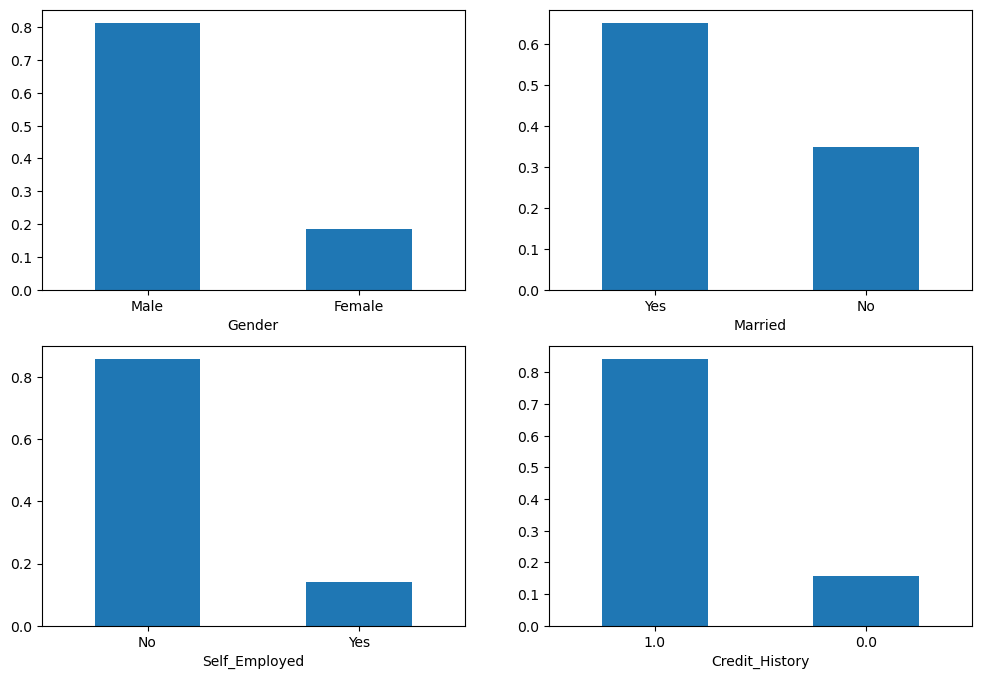

In [16]:
plt.figure(1)
plt.subplot(221) 
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(12,8)) 
plt.xticks(rotation=None)
plt.subplot(222) 
train['Married'].value_counts(normalize=True).plot(kind='bar') 
plt.xticks(rotation=None)
plt.subplot(223) 
train['Self_Employed'].value_counts(normalize=True).plot(kind='bar') 
plt.xticks(rotation=None)
plt.subplot(224) 
train['Credit_History'].value_counts(normalize=True).plot(kind='bar')
plt.xticks(rotation=None)
plt.show()

From the bar plots presented above, we can make the following observations:

Gender: Approximately 80% of the applicants in the dataset are male.

Marital Status (Married): Around 65% of the applicants in the dataset are married.

Self-Employment: About 15% of applicants in the dataset are self-employed.

Credit History: Around 85% of applicants have repaid their debts

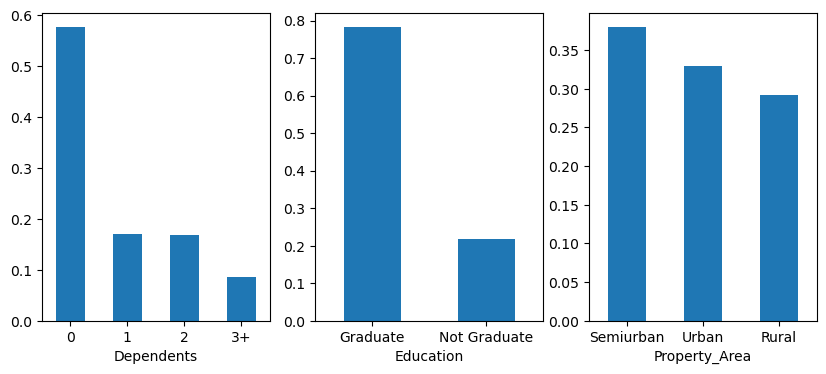

In [17]:
plt.figure(figsize=(10,4))
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot(kind='bar')
plt.xticks(rotation=None)
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot(kind='bar')
plt.xticks(rotation=None)
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot(kind='bar')
plt.xticks(rotation=None)
plt.show()

From the bar plots displayed above, we can draw the following conclusions:

Dependents: The majority of applicants do not have any dependents.
Education: Approximately 80% of the applicants are graduates.
Property Area: Most of the applicants originate from semi-urban areas

<Axes: >

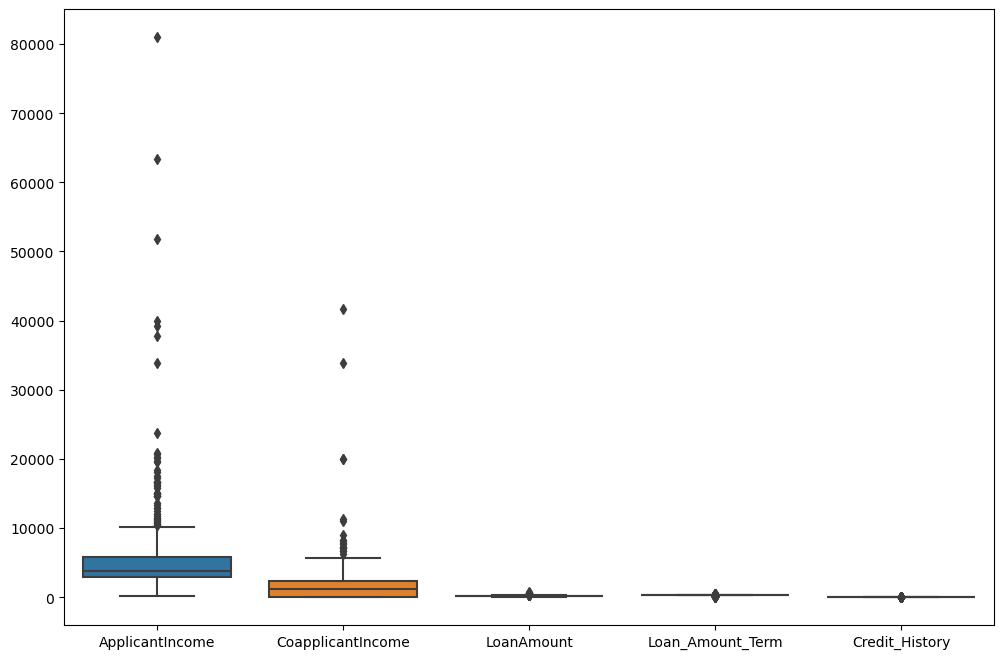

In [18]:
# Checking the outliers
plt.figure(figsize=(12,8))
sns.boxplot(data=train)

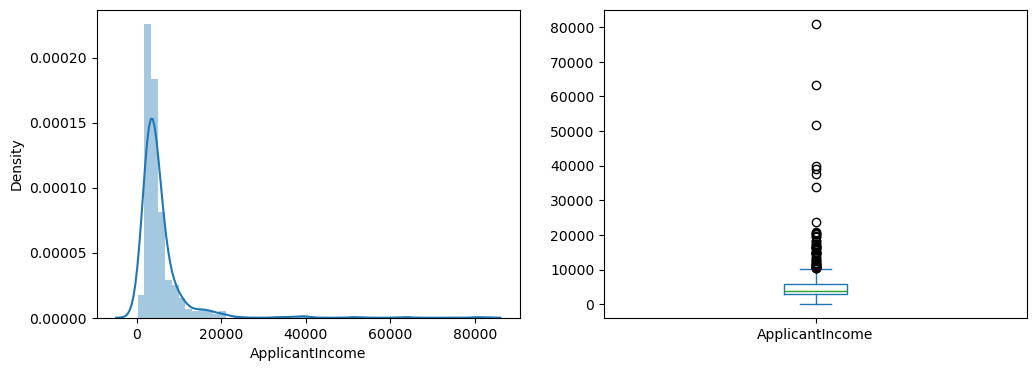

In [19]:
# Distribution of applicant income
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['ApplicantIncome']);
plt.subplot(122) 
train['ApplicantIncome'].plot.box(figsize=(12,4)) 
plt.show()

Most of the data in the distribution of applicant income are towards the left which means it is not normally distributed. We will try to make it normal in later sections as algorithms work better if the data is normally distributed.

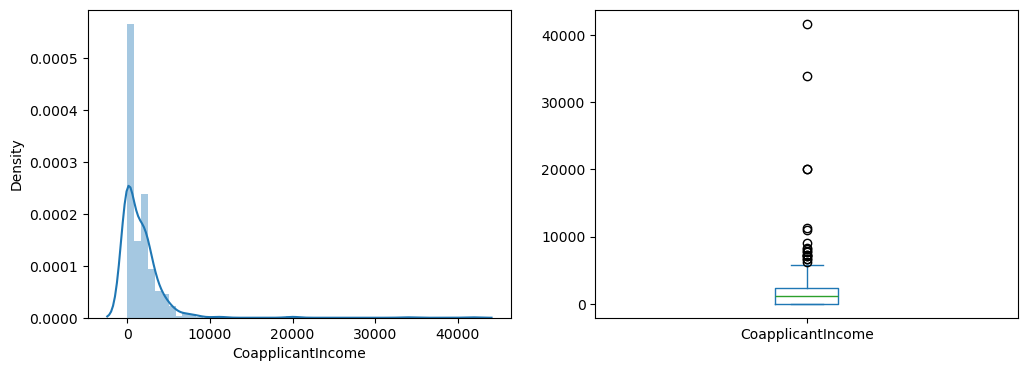

In [162]:
# Distribution of coapplicant income
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['CoapplicantIncome']);
plt.subplot(122) 
train['CoapplicantIncome'].plot.box(figsize=(12,4)) 
plt.show()

In [163]:
train['CoapplicantIncome'].value_counts(normalize=True)*100

CoapplicantIncome
0.0       44.462541
2500.0     0.814332
2083.0     0.814332
1666.0     0.814332
2250.0     0.488599
            ...    
2791.0     0.162866
1010.0     0.162866
1695.0     0.162866
2598.0     0.162866
240.0      0.162866
Name: proportion, Length: 287, dtype: float64

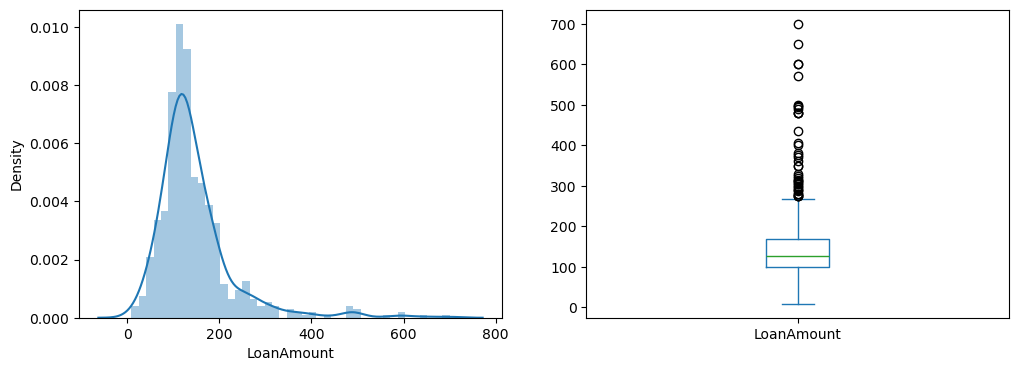

In [164]:
plt.figure(1) 
plt.subplot(121)
sns.distplot(train['LoanAmount'])
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(12,4)) 
plt.show()

We see a lot of outliers in this variable and the distribution is fairly normal. We will treat the outliers in later sections.

## Bivariate analysis

### Categorical independent variable vs target variable

<Axes: xlabel='Gender'>

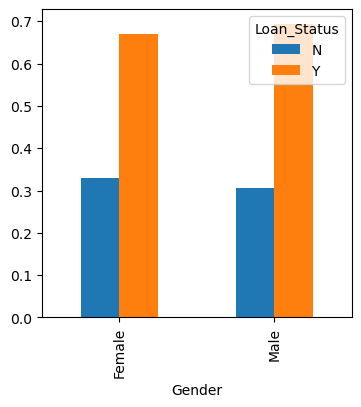

In [165]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status']) 
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4))

- The proportion of male and female applicants is more or less the same for both approved and unapproved loans

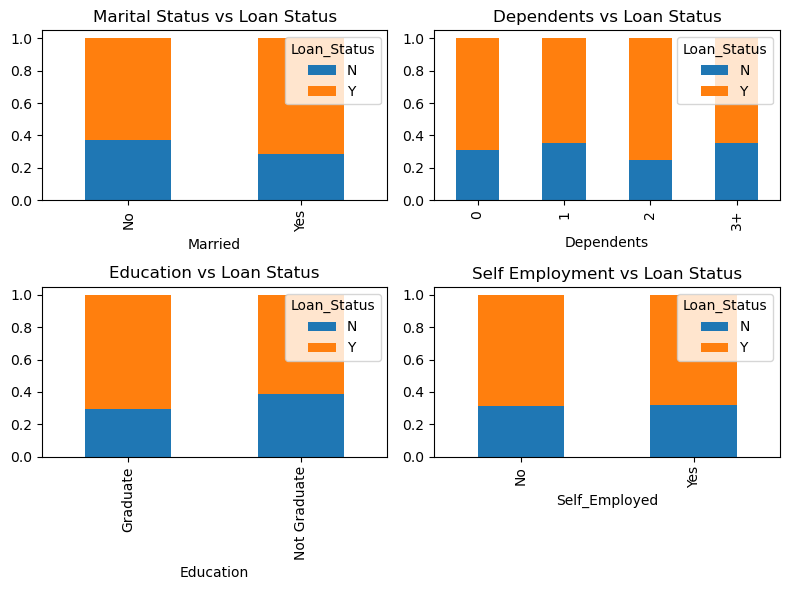

In [166]:
# Now let us visualize the remaining categorical variables vs the target variables.
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))
# Cross-tabulate and plot 'Married' data
Married = pd.crosstab(train['Married'], train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax=axes[0, 0])
axes[0, 0].set_title('Marital Status vs Loan Status')
# Cross-tabulate and plot 'Dependents' data
Dependents = pd.crosstab(train['Dependents'], train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax=axes[0, 1])
axes[0, 1].set_title('Dependents vs Loan Status')
# Cross-tabulate and plot 'Education' data
Education = pd.crosstab(train['Education'], train['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax=axes[1, 0])
axes[1, 0].set_title('Education vs Loan Status')
# Cross-tabulate and plot 'Self_Employed' data
Self_Employed = pd.crosstab(train['Self_Employed'], train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax=axes[1, 1])
axes[1, 1].set_title('Self Employment vs Loan Status')
# Show the plots
plt.tight_layout()
plt.show()

Proportion of Married Applicants: The proportion of married applicants is higher for the approved loans.

Dependents Distribution: The distribution of applicants with 1 or 3+ dependents is similar across both categories of Loan_Status

Graduate got more approval of loan compare to not Graduate.

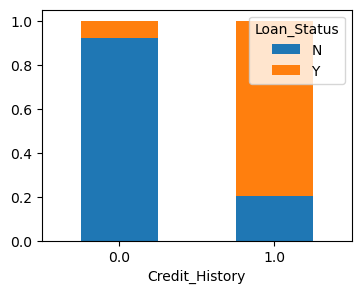

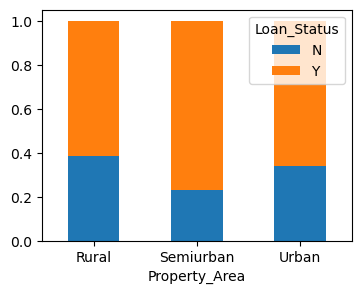

In [167]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status']) 
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,figsize=(4,3))
plt.xticks(rotation=None)
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status']) 
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,figsize=(4,3)) 
plt.xticks(rotation=None)
plt.show()

It seems people with a credit history of 1 are more likely to get their loans approved.

The proportion of loans getting approved in semi-urban areas is higher as compared to that in rural or urban areas.

### Numerical independent variable vs target variable

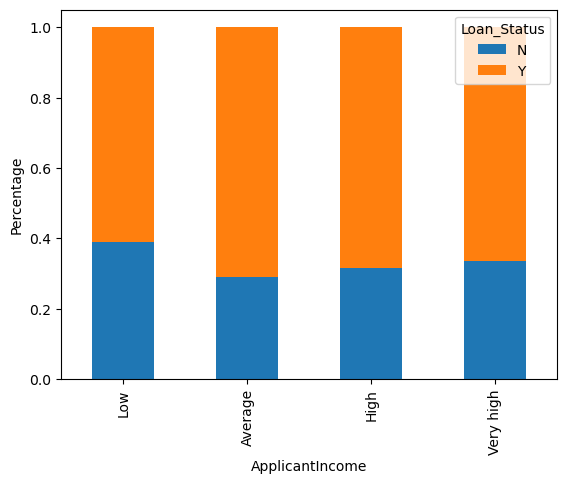

In [168]:
bins=[0,2000,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status']) 
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('ApplicantIncome') 
P = plt.ylabel('Percentage')

- It can be inferred that Applicant’s income does not affect that much to the chances of loan approval 

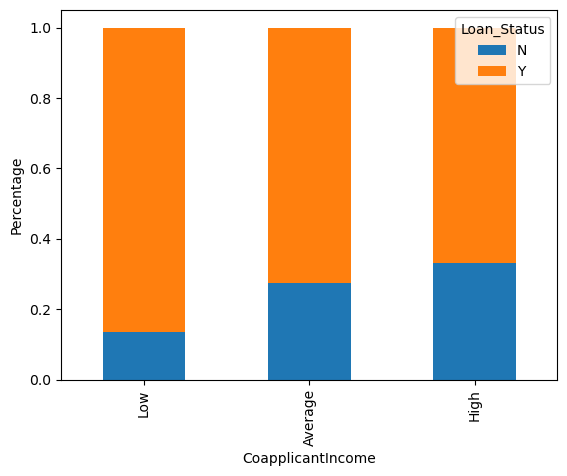

In [169]:
bins=[0,1000,3000,42000] 
group=['Low','Average','High'] 
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status']) 
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('CoapplicantIncome') 
P = plt.ylabel('Percentage')

It shows that if co-applicants income is less the chances of loan approval are high. But this does not look right. The possible reason behind this may be that most of the applicants don’t have any co-applicant so the co-applicant income for such applicants is 0 and hence the loan approval is not dependent on it. So we can make a new variable in which we will combine the applicant’s and co applicants’ income to visualize the combined effect of income on loan approval.

Let us combine the Applicant Income and Co-applicant Income and see the combined effect of Total Income on the Loan_Status.

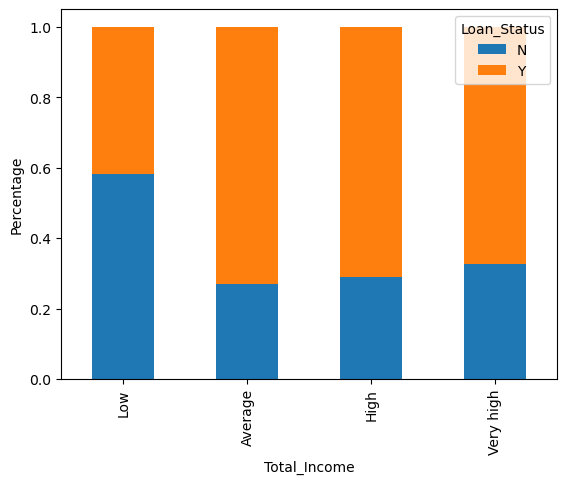

In [170]:
# COMBINING APPLICANT AND CO-APPLICANT INCOME
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status']) 
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('Total_Income') 
P = plt.ylabel('Percentage')

- We can see that Proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with Average, High, and Very High Income.

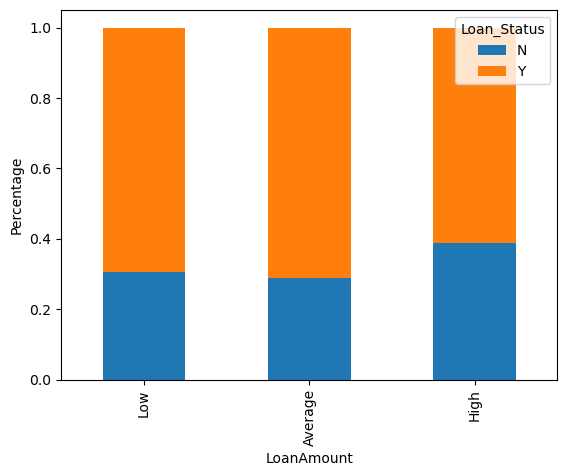

In [171]:
# Visualizing loan ammounts
bins=[0,100,200,700] 
group=['Low','Average','High'] 
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status']) 
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('LoanAmount') 
P = plt.ylabel('Percentage')

In [172]:
train=train.drop(['Income_bin', 'Coapplicant_Income_bin',
 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)
train['Dependents'].replace('3+', 3,inplace=True) 
test['Dependents'].replace('3+', 3,inplace=True) 

In [173]:
train.shape, test.shape

((614, 12), (367, 11))

In [174]:
train['Loan_Status'].replace('N', 0,inplace=True) 
train['Loan_Status'].replace('Y', 1,inplace=True)
train_num_col=train.select_dtypes(include=np.number)

In [175]:
train_num_col.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,5849,0.0,NaN,360.0,1.0,1
1,4583,1508.0,128.0,360.0,1.0,0
2,3000,0.0,66.0,360.0,1.0,1
3,2583,2358.0,120.0,360.0,1.0,1
4,6000,0.0,141.0,360.0,1.0,1


### **Correlation Heatmap**

In [176]:
corr=train_num_col.corr()
corr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


<Axes: >

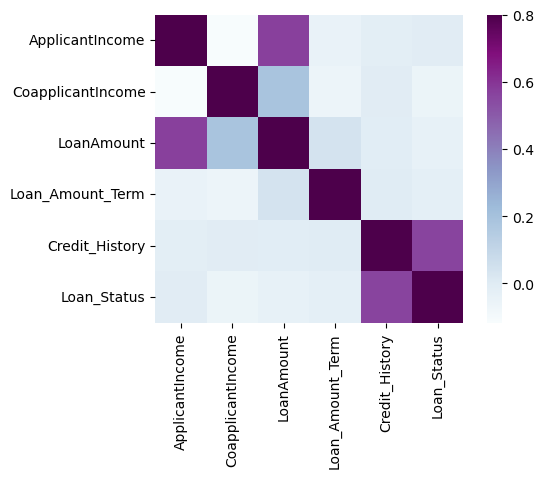

In [177]:
 f, ax = plt.subplots(figsize=(6,4)) 
sns.heatmap(corr,vmax=.8, square=True, cmap="BuPu")

We see that the most correlated variables are (ApplicantIncome — LoanAmount) and (Credit_History — Loan_Status). LoanAmount is also correlated with CoapplicantIncome


## Data Cleaning

MISSING VALUE IMPUTATION

In [178]:
train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, and Credit_History features.We will treat the missing values in all the features one by one.

In [179]:
train['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [180]:
train['Married'].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [181]:
train['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [182]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [183]:
train['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [184]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [185]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [186]:
train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [187]:
# FILLING MISSING VALU IN TEST DATASET
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True) 
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True) 
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

### Feature Engineering

In [188]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

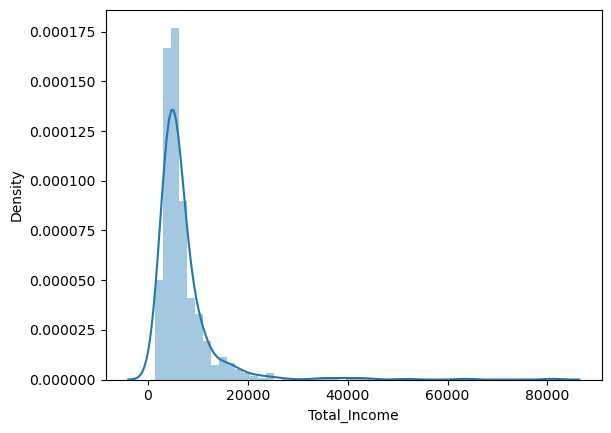

In [189]:
#checking the distribution of Total Income.
sns.distplot(train['Total_Income']);

Most of the data in the distribution of Total_Income are towards the left which means it is not normally distributed
so we we will try to make it normally distributed and for that here i am using log transformation

similarly we will do for LoanAmount and ApplicantIncome

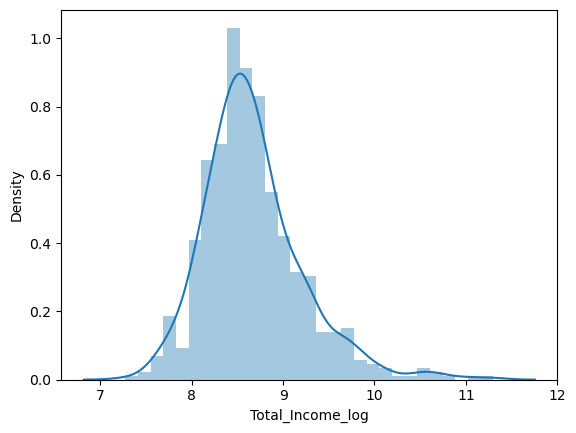

In [190]:
train['Total_Income_log'] = np.log(train['Total_Income']) 
sns.distplot(train['Total_Income_log']); 
test['Total_Income_log'] = np.log(test['Total_Income'])

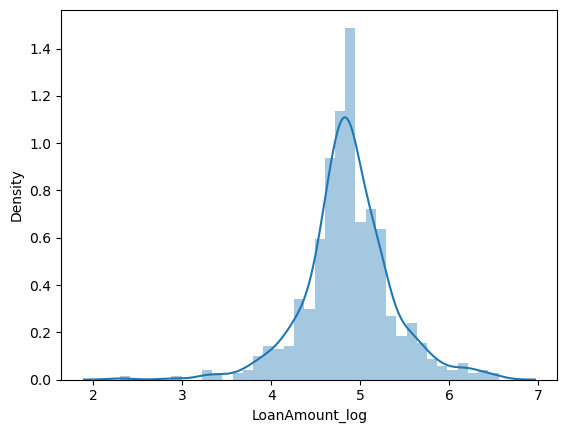

In [191]:
train['LoanAmount_log'] = np.log(train['LoanAmount']+1) 
sns.distplot(train['LoanAmount_log']); 
test['LoanAmount_log'] = np.log(test['LoanAmount']+1)

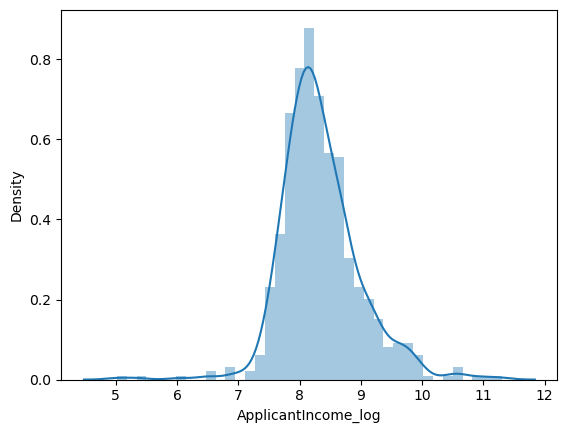

In [192]:
train['ApplicantIncome_log'] = np.log(train['ApplicantIncome']+1) 
sns.distplot(train['ApplicantIncome_log']) 
test['ApplicantIncome_log'] = np.log(test['ApplicantIncome']+1)

In [193]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Total_Income_log,LoanAmount_log,ApplicantIncome_log
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,5849.0,8.674026,4.859812,8.674197
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,6091.0,8.714568,4.859812,8.430327
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,3000.0,8.006368,4.204693,8.006701
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4941.0,8.505323,4.795791,7.857094
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,6000.0,8.699515,4.955827,8.699681


In [194]:
#drop unnecessary columns
cols=['ApplicantIncome','CoapplicantIncome','LoanAmount','Total_Income']
train=train.drop(columns=cols,axis=1)
train.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income_log,LoanAmount_log,ApplicantIncome_log
0,Male,No,0,Graduate,No,360.0,1.0,Urban,1,8.674026,4.859812,8.674197
1,Male,Yes,1,Graduate,No,360.0,1.0,Rural,0,8.714568,4.859812,8.430327
2,Male,Yes,0,Graduate,Yes,360.0,1.0,Urban,1,8.006368,4.204693,8.006701
3,Male,Yes,0,Not Graduate,No,360.0,1.0,Urban,1,8.505323,4.795791,7.857094
4,Male,No,0,Graduate,No,360.0,1.0,Urban,1,8.699515,4.955827,8.699681


In [195]:
X = train.drop('Loan_Status',axis=1)
y = train.Loan_Status

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25,random_state=42)

In [197]:
X=pd.get_dummies(X) 
train=pd.get_dummies(train) 
test=pd.get_dummies(test)

### MODEL BUILDING Part 1

In [198]:
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X,y, test_size =0.25)

In [199]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [200]:
pred_cv = model.predict(X_cv)
accuracy_score(y_cv,pred_cv)

0.8506493506493507

In [201]:
# Check for infinity or NaN values in the test data
if np.any(np.isinf(test)) or np.any(np.isnan(test)):
    print("Test data contains infinity or NaN values")
else:
    print("Test data is clean")

Test data is clean


In [202]:
test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,Total_Income_log,LoanAmount_log,ApplicantIncome_log,Gender_Female,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,5720,8.651724,4.709530,8.651899,False,...,True,False,False,True,False,True,False,False,False,True
1,3076,1500,126.0,360.0,1.0,4576,8.428581,4.844187,8.031710,False,...,False,True,False,True,False,True,False,False,False,True
2,5000,1800,208.0,360.0,1.0,6800,8.824678,5.342334,8.517393,False,...,False,False,True,True,False,True,False,False,False,True
3,2340,2546,100.0,360.0,1.0,4886,8.494129,4.615121,7.758333,False,...,False,False,True,True,False,True,False,False,False,True
4,3276,0,78.0,360.0,1.0,3276,8.094378,4.369448,8.094684,False,...,True,False,False,False,True,True,False,False,False,True


In [203]:
cols=['ApplicantIncome','CoapplicantIncome','LoanAmount','Total_Income']
test=test.drop(columns=cols,axis=1)
test.head()

,Loan_Amount_Term,Credit_History,Total_Income_log,LoanAmount_log,ApplicantIncome_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,360.0,1.0,8.651724,4.709530,8.651899,False,True,False,True,False,True,False,False,True,False,True,False,False,False,True
1,360.0,1.0,8.428581,4.844187,8.031710,False,True,False,True,False,False,True,False,True,False,True,False,False,False,True
2,360.0,1.0,8.824678,5.342334,8.517393,False,True,False,True,False,False,False,True,True,False,True,False,False,False,True
3,360.0,1.0,8.494129,4.615121,7.758333,False,True,False,True,False,False,False,True,True,False,True,False,False,False,True
4,360.0,1.0,8.094378,4.369448,8.094684,False,True,True,False,False,True,False,False,False,True,True,False,False,False,True


In [204]:
pred_test = model.predict(test)

In [205]:
pred_test

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

### Logistic Regression Using Stratified k-folds Cross-validation

In [206]:
from sklearn.model_selection import StratifiedKFold

In [227]:
# Initialize the fold counter
i = 1
total_accuracy = 0
# Create a StratifiedKFold object
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
# Loop through the folds
for train_index, test_index in kf.split(X, y):
    print(f'Fold {i} of {kf.n_splits}')
    
    # Split the data into training and validation sets
    xtr, xvl = X.iloc[train_index], X.iloc[test_index]
    ytr, yvl = y.iloc[train_index], y.iloc[test_index]
    
    # Create and train a Logistic Regression model
    model_one = LogisticRegression(random_state=1)
    model_one.fit(xtr, ytr)
    
    # Make predictions on the validation set
    pred_test_one = model_one.predict(xvl)
    
    # Calculate and print the accuracy score
    score = accuracy_score(yvl, pred_test_one)
    print('Accuracy Score:', score)
    
    # Accumulate the accuracy for mean calculation
    total_accuracy += score
    
    i += 1
# Calculate the mean validation accuracy
mean_accuracy = total_accuracy / kf.n_splits
print('Mean Validation Accuracy:', mean_accuracy)
# Make predictions on the test set
pred_test = model.predict(test)
pred = model.predict_proba(xvl)[:, 1]  # This line should be outside the loop, using the last model

Fold 1 of 5
Accuracy Score: 0.8130081300813008
Fold 2 of 5
Accuracy Score: 0.8373983739837398
Fold 3 of 5
Accuracy Score: 0.7967479674796748
Fold 4 of 5
Accuracy Score: 0.8048780487804879
Fold 5 of 5
Accuracy Score: 0.7950819672131147
Mean Validation Accuracy: 0.8094228975076636


### Plotting ROC curve

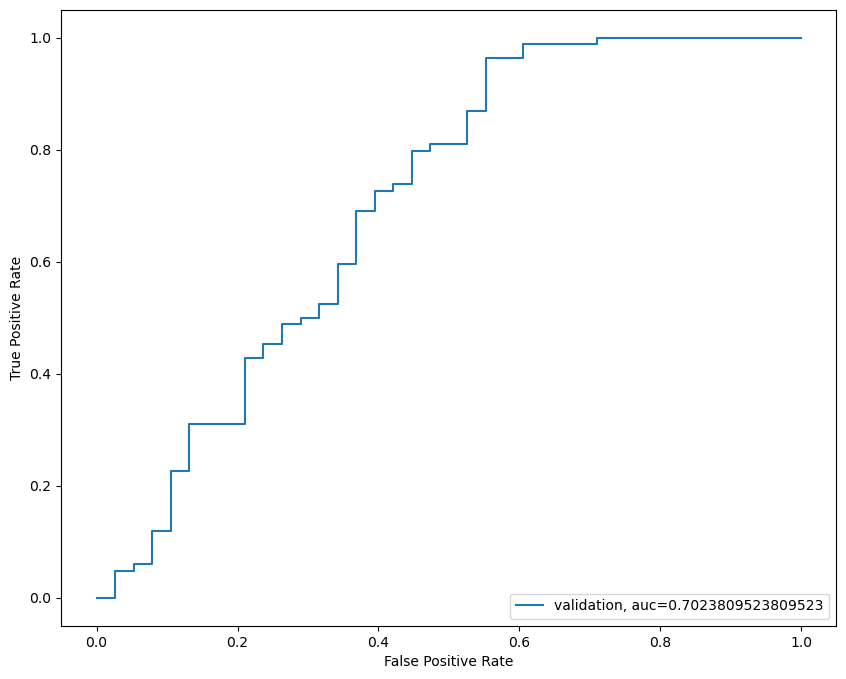

In [221]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl,  pred)
auc = metrics.roc_auc_score(yvl, pred) 
plt.figure(figsize=(10,8)) 
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

### Model building part-2

##### Decision Tree

In [228]:
from sklearn import tree
# Initialize a fold counter
fold_counter = 1
total_accuracy = 0
# Create a StratifiedKFold object with 5 splits
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in kf.split(X, y):
    print(f'Fold {fold_counter} of {kf.get_n_splits()}')
    
    # Split the data into training and validation sets
    x_train, x_val = X.loc[train_index], X.loc[test_index]
    y_train, y_val = y[train_index], y[test_index]
    
    # Create and train the Decision Tree model
    model_df = tree.DecisionTreeClassifier(random_state=1)
    model_df.fit(x_train, y_train)
    
    # Make predictions on the validation set
    pred_val_df = model_df.predict(x_val)
    
    # Calculate and print the accuracy score
    accuracy = accuracy_score(y_val, pred_val_df)
    print('Accuracy Score:', accuracy)
    
    # Accumulate the accuracy for mean calculation
    total_accuracy += accuracy
    
    # Increment the fold counter
    fold_counter += 1
# Calculate the mean validation accuracy
mean_accuracy = total_accuracy / kf.get_n_splits()
print('Mean Validation Accuracy:', mean_accuracy)
# Make predictions on the test set using the last trained model
pred_test = model.predict(test)

Fold 1 of 5
Accuracy Score: 0.7317073170731707
Fold 2 of 5
Accuracy Score: 0.6910569105691057
Fold 3 of 5
Accuracy Score: 0.7154471544715447
Fold 4 of 5
Accuracy Score: 0.6829268292682927
Fold 5 of 5
Accuracy Score: 0.6721311475409836
Mean Validation Accuracy: 0.6986538717846196


##### Random Forest

In [229]:
# RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

# Initialize the total accuracy and fold counter
total_accuracy = 0
fold_counter = 1

kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

for train_index, test_index in kf.split(X, y):
    print(f'Fold {fold_counter} of {kf.get_n_splits()}')
    
    # Split the data into training and validation sets
    x_train, x_val = X.loc[train_index], X.loc[test_index]
    y_train, y_val = y[train_index], y[test_index]
    
    # Create and train the Random Forest model with a maximum depth of 10
    model_RF = RandomForestClassifier(random_state=1, max_depth=10)
    model_RF.fit(x_train, y_train)
    
    # Make predictions on the validation set
    pred_val_RF = model_RF.predict(x_val)
    
    # Calculate and print the accuracy score
    accuracy = accuracy_score(y_val, pred_val_RF)
    print('Accuracy Score:', accuracy)
    
    # Accumulate the accuracy for mean calculation
    total_accuracy += accuracy
    
    # Increment the fold counter
    fold_counter += 1

# Calculate the mean validation accuracy
mean_accuracy = total_accuracy / kf.get_n_splits()
print('Mean Validation Accuracy:', mean_accuracy)

# Make predictions on the test set using the last trained model
pred_test = model.predict(test)

Fold 1 of 5
Accuracy Score: 0.8211382113821138
Fold 2 of 5
Accuracy Score: 0.8211382113821138
Fold 3 of 5
Accuracy Score: 0.8048780487804879
Fold 4 of 5
Accuracy Score: 0.8048780487804879
Fold 5 of 5
Accuracy Score: 0.7786885245901639
Mean Validation Accuracy: 0.8061442089830735


<Axes: >

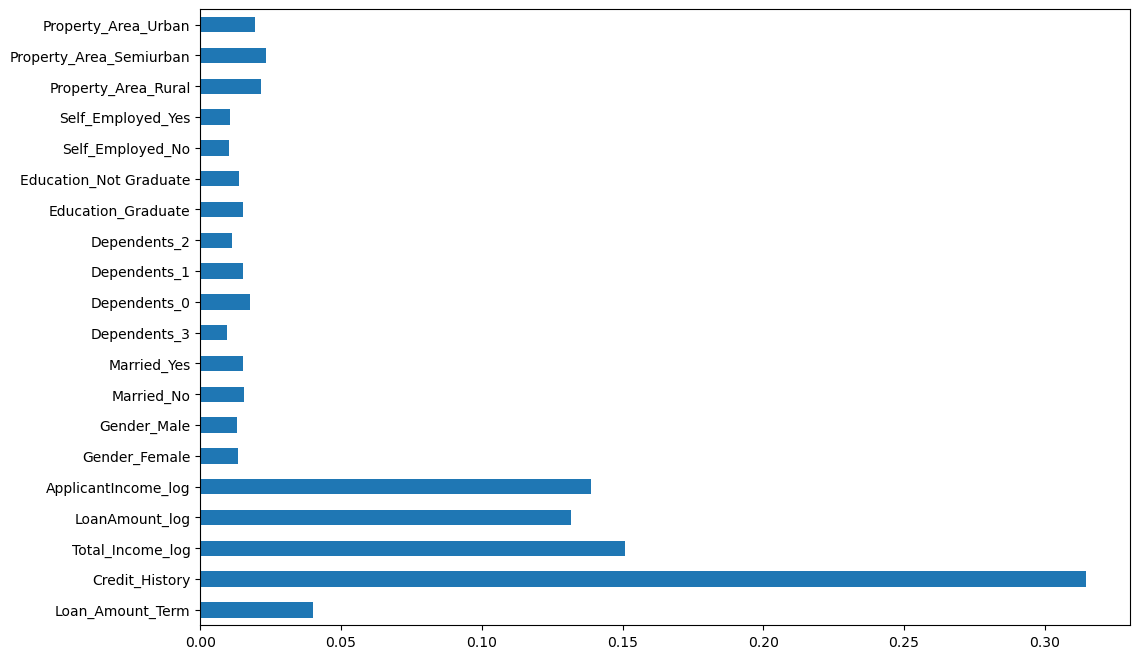

In [230]:
importances=pd.Series(model_RF.feature_importances_, index=X.columns) 
importances.plot(kind='barh', figsize=(12,8))

##### XGBoost

In [231]:
# XGBOOST
from xgboost import XGBClassifier
# Initialize a fold counter
fold_counter = 1
total_accuracy = 0
# Create a StratifiedKFold object with 5 splits
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in kf.split(X, y):
    print(f'Fold {fold_counter} of {kf.get_n_splits()}')
    
    # Split the data into training and validation sets
    x_train, x_val = X.loc[train_index], X.loc[test_index]
    y_train, y_val = y[train_index], y[test_index]
    
    # Create and train the XGBoost model with 50 estimators and a maximum depth of 4
    model_XGB = XGBClassifier(n_estimators=50, max_depth=4)
    model_XGB.fit(x_train, y_train)
    
    # Make predictions on the validation set
    pred_val_XGB = model_XGB.predict(x_val)
    
    # Calculate and print the accuracy score
    accuracy = accuracy_score(y_val, pred_val_XGB)
    print('Accuracy Score:', accuracy)
    
    # Accumulate the accuracy for mean calculation
    total_accuracy += accuracy
    
    # Increment the fold counter
    fold_counter += 1
# Calculate the mean validation accuracy
mean_accuracy = total_accuracy / kf.get_n_splits()
print('Mean Validation Accuracy:', mean_accuracy)
# Make predictions on the test set
pred_test = model.predict(test)

Fold 1 of 5
Accuracy Score: 0.8292682926829268
Fold 2 of 5
Accuracy Score: 0.7723577235772358
Fold 3 of 5
Accuracy Score: 0.7560975609756098
Fold 4 of 5
Accuracy Score: 0.7398373983739838
Fold 5 of 5
Accuracy Score: 0.7622950819672131
Mean Validation Accuracy: 0.7719712115153937


### Conclusion Till Now

In this machine learning project, we evaluated the performance of four different models on our dataset. The goal was to determine which model provides the highest classification accuracy. Here are the key findings:dels

1. Logistic Regression:
- Mean Validation Accuracy: 0.81
- Performance: Highest accuracy among the models

2. Decision Tree:
- Mean Validation Accuracy: 0.70
- Performance: Lower accuracy compared to other models

3. Random Forest:
- Mean Validation Accuracy: 0.806
- Performance: Good accuracy

4. XGBoost:
- Mean Validation Accuracy: Approximately 0.772
- Performance: Moderate accuracy

In [232]:
from sklearn.metrics import classification_report

def generate_classification_report(model_name,y_test,y_pred):
  report = classification_report(y_test,y_pred)
  print(f"Classification Report For {model_name}:\n{report}\n")

generate_classification_report(model_one,yvl, pred_test_one)
generate_classification_report(model_df,y_val, pred_val_df)
generate_classification_report(model_RF,y_val, pred_val_RF)
generate_classification_report(model_XGB,y_val, pred_val_XGB)

Classification Report For LogisticRegression(random_state=1):
              precision    recall  f1-score   support

           0       0.93      0.37      0.53        38
           1       0.78      0.99      0.87        84

    accuracy                           0.80       122
   macro avg       0.85      0.68      0.70       122
weighted avg       0.82      0.80      0.76       122


Classification Report For DecisionTreeClassifier(random_state=1):
              precision    recall  f1-score   support

           0       0.47      0.47      0.47        38
           1       0.76      0.76      0.76        84

    accuracy                           0.67       122
   macro avg       0.62      0.62      0.62       122
weighted avg       0.67      0.67      0.67       122


Classification Report For RandomForestClassifier(max_depth=10, random_state=1):
              precision    recall  f1-score   support

           0       0.82      0.37      0.51        38
           1       0.77    

In [234]:
train['Loan_Status'].value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

### **Data is slight Imbalance**

In [235]:
pip install -U imbalanced-learn

   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/258.3 kB 325.1 kB/s eta 0:00:01
   ------ -------------------------------- 41.0/258.3 kB 245.8 kB/s eta 0:00:01
   ------------ -------------------------- 81.9/258.3 kB 381.3 kB/s eta 0:00:01
   ------------- ------------------------- 92.2/258.3 kB 374.1 kB/s eta 0:00:01
   ------------------ ------------------- 122.9/258.3 kB 423.5 kB/s eta 0:00:01
   --------------------- ---------------- 143.4/258.3 kB 448.2 kB/s eta 0:00:01
   ------------------------- ------------ 174.1/258.3 kB 476.3 kB/s eta 0:00:01
   ---------------------------- --------- 194.6/258.3 kB 491.5 kB/s eta 0:00:01
   --------------------------------- ---- 225.3/258.3 kB 491.0 kB/s eta 0:00:01
   -------------------------------------- 258.3/258.3 kB 511.5 kB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existi

In [236]:
from imblearn.over_sampling import RandomOverSampler

In [237]:
oversample = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversample.fit_resample(X,y)

train_resampled = pd.concat([pd.DataFrame(X_resampled,columns=X.columns),pd.Series(y_resampled,name="Loan_status")],axis=1)

In [238]:
y_resampled.value_counts()

Loan_Status
1    422
0    422
Name: count, dtype: int64

In [242]:
X_resampled_train, X_resampled_test, y_resampled_train, y_resampled_test = train_test_split(X_resampled,y_resampled,test_size = 0.25,random_state=42)

In [243]:
## Logistic Regression
model1 = LogisticRegression()
model1.fit(X_resampled_train,y_resampled_train)
y_pred_model1 = model1.predict(X_resampled_test)
accuracy = accuracy_score(y_resampled_test,y_pred_model1)
accuracy*100

68.24644549763033

In [246]:
## Decision Tree Classifier

model2 = DecisionTreeClassifier()
model2.fit(X_resampled_train,y_resampled_train)
y_pred_model2 = model2.predict(X_resampled_test)
accuracy = accuracy_score(y_resampled_test,y_pred_model2)
print("Accuracy score of Decision Tree: ", accuracy*100)

Accuracy score of Decision Tree:  79.62085308056872


In [248]:
## Random Forest Classifier

model3 = RandomForestClassifier()
model3.fit(X_resampled_train,y_resampled_train)
y_pred_model3 = model3.predict(X_resampled_test)
accuracy = accuracy_score(y_resampled_test,y_pred_model3)
print("Accuracy score of Random Forest: ", accuracy*100)

Accuracy score of Random Forest:  87.67772511848341


In [249]:
import xgboost as xgb
model_xgb = xgb.XGBClassifier()
model_xgb.fit(X_resampled_train, y_resampled_train)
y_pred_model_xgb = model_xgb.predict(X_resampled_test)
accuracy_xgb = accuracy_score(y_resampled_test, y_pred_model_xgb)
print("Accuracy score of XGBoost: ", accuracy_xgb * 100)


Accuracy score of XGBoost:  83.41232227488152


In [251]:
from sklearn.metrics import classification_report

def generate_classification_report(model_name,y_test,y_pred):
  report = classification_report(y_test,y_pred)
  print(f"Classification Report For {model_name}:\n{report}\n")

generate_classification_report(model1,y_resampled_test,y_pred_model1)
generate_classification_report(model2,y_resampled_test,y_pred_model2)
generate_classification_report(model3,y_resampled_test,y_pred_model3)
generate_classification_report(model_xgb,y_resampled_test,y_pred_model_xgb)

Classification Report For LogisticRegression():
              precision    recall  f1-score   support

           0       0.80      0.55      0.65       114
           1       0.61      0.84      0.71        97

    accuracy                           0.68       211
   macro avg       0.71      0.69      0.68       211
weighted avg       0.71      0.68      0.68       211


Classification Report For DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       114
           1       0.81      0.72      0.77        97

    accuracy                           0.80       211
   macro avg       0.80      0.79      0.79       211
weighted avg       0.80      0.80      0.79       211


Classification Report For RandomForestClassifier():
              precision    recall  f1-score   support

           0       0.91      0.86      0.88       114
           1       0.84      0.90      0.87        97

    accuracy                

#### Conclusion after treating imbalance data 

- Random forest got the highest accuracy = 87.67
- Accuracy of XGBoost and decision tree classifier has Increased
- Accuracy of Logistic Regression decreased